In [14]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import EoN
from Q2Mod import aggregate
from tqdm import tqdm 

In [15]:
# Unpack pickle data
G = pd.read_pickle('networks.pkl')

# Initial Parameters
rho = 1
g, b = 0.08, 0.01
maxTime = 10
maxIter = 50

H = aggregate(G, rho)

100%|██████████| 50/50 [00:13<00:00,  3.75it/s]


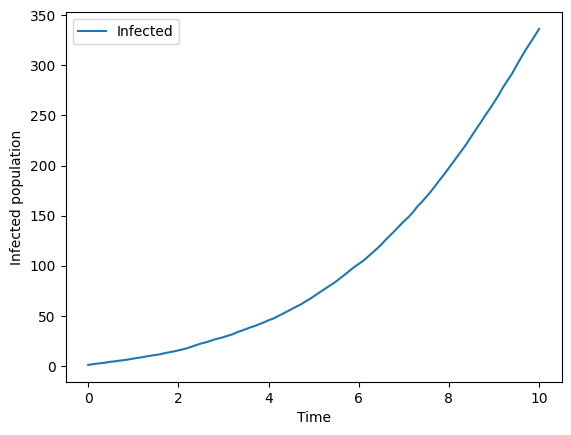

100%|██████████| 50/50 [00:00<00:00, 836.70it/s]


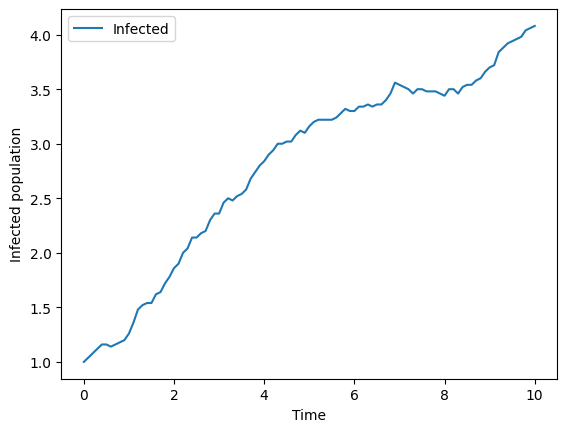

,Time,Susceptible,Infected
0,0.0,11491.00,1.00
1,0.1,11490.96,1.04
2,0.2,11490.92,1.08
3,0.3,11490.88,1.12
4,0.4,11490.84,1.16
...,...,...,...
96,9.6,11488.04,3.96
97,9.7,11488.02,3.98
98,9.8,11487.96,4.04
99,9.9,11487.94,4.06


In [16]:
# Simulating SIS model on the aggregated network
# Simulating SIS model on the aggregated network

def SIS(G, b, g):
    dt = pd.DataFrame({'Time':[], 'Susceptible':[], 'Infected':[]})
    times = np.linspace(0, maxTime, 101)
    So = np.zeros(len(times))
    Io = np.zeros(len(times))
    for iter in tqdm(range(maxIter)):
        t, S, I = EoN.fast_SIS(G, b, g, initial_infecteds=['1'])
        Sn, In = EoN.subsample(times, t, S, I)
        So += Sn
        Io += In
    dt['Susceptible'] = So/float(maxIter)
    dt['Infected'] = Io/float(maxIter)
    dt['Time'] = times

    # Plotting the time frame 
    # plt.plot(dt['Time'], dt['Susceptible'], label = 'Susceptible')
    plt.plot(dt['Time'], dt['Infected'], label = 'Infected')
    plt.xlabel('Time')
    plt.ylabel('Infected population')
    plt.legend()
    plt.savefig(f'Q-2.2.SIS_On_network_with_b={b}_g={g}.png')
    plt.show()
    return dt   

SIS(H, 0.01, 0.08)
SIS(H, 0.001, 0.08)